In [1]:
# import the package
import tensorflow as tf
from tensorflow.keras.datasets import cifar10 
import numpy as np 

In [2]:
# split the train and test set
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

In [3]:
X_train.shape 

(50000, 32, 32, 3)

In [4]:
y_train[:5] # it a two dimension array but 
# we want only index of classes value like
#  6 is frog etc so reshape it

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
classes = ["airplane", "automobile" , "bird" , "cat" , "deer" , "dog" , "frog" , "horse" , "ship" , "truck"]

C:\Users\naras\AppData\Local\Temp\ipykernel_16820\1517525516.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(classes[int(y[index])])


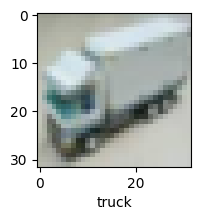

In [6]:
import matplotlib.pyplot as plt 

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))  # Set figure size
    plt.imshow(X[index])  # Display the image
    plt.xlabel(classes[int(y[index])])
    plt.show()  # Ensure the plot is displayed

# Call the function
plot_sample(X_train, y_train, 53)

In [7]:
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# Build a model
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32 , (3,3) , activation="relu" ,input_shape = (32,32,3)),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Conv2D(64 , (3,3) , activation="relu"),
    MaxPooling2D(pool_size= (2,2)),

    Flatten(),
    Dense(64 , activation="relu"),
    Dense(10  ,activation="softmax")
])

C:\Users\naras\.conda\envs\narsimha\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# compile the model
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

In [11]:
# train the model
model.fit(X_train , y_train , epochs=10 , validation_data=(X_test , y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.3239 - loss: 1.8227 - val_accuracy: 0.5417 - val_loss: 1.2893
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5491 - loss: 1.2595 - val_accuracy: 0.5957 - val_loss: 1.1413
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6126 - loss: 1.1101 - val_accuracy: 0.6008 - val_loss: 1.1175
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6444 - loss: 1.0096 - val_accuracy: 0.6513 - val_loss: 1.0019
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6733 - loss: 0.9281 - val_accuracy: 0.6725 - val_loss: 0.9512
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6994 - loss: 0.8612 - val_accuracy: 0.6756 - val_loss: 0.9463
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7096 - loss: 0.8223 - val_accuracy: 0.6731 - val_loss: 0.9441
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7292 -

In [12]:
model.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7067 - loss: 0.8868


[0.894108772277832, 0.7008000016212463]

In [13]:
y_pred = model.predict(X_test)
y_pred[:4]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[1.80734787e-03, 1.14472630e-03, 3.78941512e-03, 9.10506785e-01,
        2.54293467e-04, 4.85180654e-02, 7.54543301e-03, 3.47196648e-04,
        1.87042821e-02, 7.38246879e-03],
       [3.64964502e-03, 1.27462642e-02, 2.38478002e-08, 1.59022786e-08,
        6.93168190e-08, 1.30777578e-09, 1.57222202e-09, 7.12269133e-09,
        9.82885599e-01, 7.18348718e-04],
       [1.23441614e-01, 3.79888564e-02, 2.23635137e-03, 1.03743887e-03,
        6.87764841e-04, 1.80282223e-04, 1.98656489e-04, 3.02272907e-04,
        8.20878565e-01, 1.30483555e-02],
       [9.86272335e-01, 2.53903068e-04, 1.86193117e-03, 5.00455644e-05,
        5.88989060e-04, 2.14220472e-06, 1.22576221e-05, 2.41447947e-06,
        1.09232347e-02, 3.26577938e-05]], dtype=float32)

In [14]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [15]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [16]:
# save the model

model.save("my_model.h5")